<a href="https://colab.research.google.com/github/lblabucsd/Zada_Schulze_24/blob/main/dc_neural_analysis_selectivity_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is for combine and analysis the 2p imaging and global motion/starfield stimuli/behavior done with the bonsai workflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


#load packages
!pip install pynrrd
!pip install scikit-posthocs

import os
import csv
import numpy as np
import pandas as pd
import math
import time
import json
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import nrrd
import scipy
from scipy import io
from scipy.fftpack import rfft, irfft, fftfreq
import scipy.stats as stats
import statsmodels
import seaborn as sns
from sklearn.decomposition import PCA, FastICA
from sklearn.cluster import KMeans, AgglomerativeClustering
import random
from random import randrange
from random import shuffle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
import scikit_posthocs as sp
%matplotlib inline
sns.set_style("white")



def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def running_mean(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

def norm(inputs):
    output = (inputs-min(inputs))/(max(inputs)-min(inputs))
    return output

def baseline_subtraction(angle, window):
    new=[]
    for ndx,i in enumerate(angle):
        if ndx<window/2 or ndx>len(angle)-window/2:
            new.append(0)
        else:
            baseline=np.median(angle[ndx-int(window/2):ndx+int(window/2)])
            new.append(i-baseline)
    return new

def resized(data,N):
    old_indices = np.linspace(0, len(data) - 1, len(data))
    new_indices = np.linspace(0, len(data) - 1, N)
    res = np.interp(new_indices, old_indices, data)
    return res

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

sns.set(font_scale=3)
sns.set_style("white")

figure_savepath = '/content/drive/MyDrive/Zada_Schulze_paper/Figures_output/Neural_activity/Selectivity_index/'

print('loaded')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
loaded


number of cells 2,4,6:   4397 8095 9155
fraction modulated 2,4,6:   0.08664998862861041 0.12489190858554663 0.12408519934462042
social s1


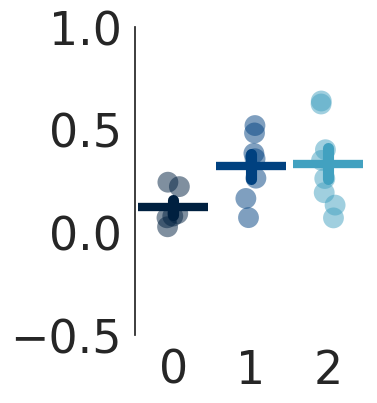

means, sems, and Ns for data is 
0.12153734925339767 0.036284785524368694 6
0.32015806635589883 0.06199997846539006 7
0.33348508393045445 0.07536788819699147 8
wk2v4 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.4]: p-value = 0.012917
wk2v6 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.6]: p-value = 0.046260
wk4v6 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.6]: p-value = 0.923481
social s2


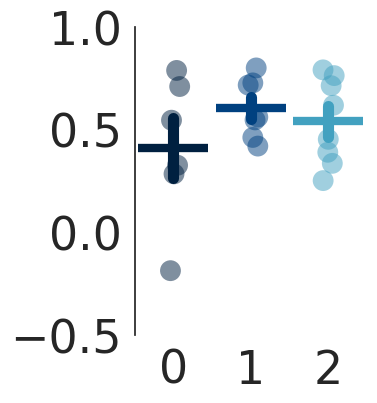

means, sems, and Ns for data is 
0.4106143155621034 0.14497583714031465 6
0.6042992342929916 0.054727607979473784 7
0.5388944956089066 0.07371159438796183 8
wk2v4 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.4]: p-value = 0.264166
wk2v6 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.6]: p-value = 0.549689
wk4v6 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.6]: p-value = 0.495932
social s3


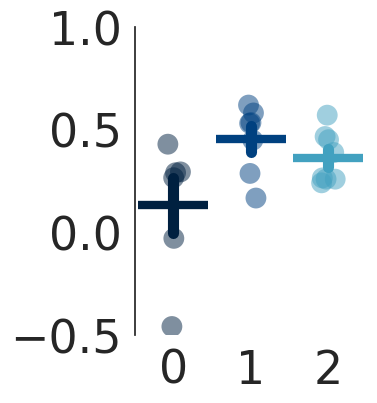

means, sems, and Ns for data is 
0.13100690267433734 0.13323947093699373 6
0.45179063415975357 0.06293776460043328 7
0.3617575676264482 0.043994218287439796 8
wk2v4 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.4]: p-value = 0.018443
wk2v6 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.6]: p-value = 0.075926
wk4v6 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.6]: p-value = 0.239373
social s4


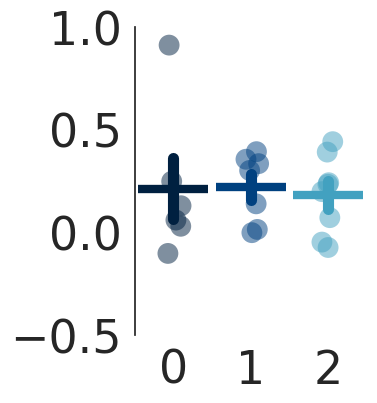

means, sems, and Ns for data is 
0.2117792950401002 0.14757401514783047 6
0.21849753328822488 0.06290373002313651 7
0.18108985228056781 0.06652444278311856 8
wk2v4 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.4]: p-value = 0.994863
wk2v6 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.6]: p-value = 0.778411
wk4v6 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.6]: p-value = 0.585444


In [ ]:
#Stimulus selectivity - social motion

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multitest as multi
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.simplefilter('ignore')


wk2_subjects = [
'DZ-230518_wk2_f1_z-130_schooling',
'DZ-230605-f3-100_2wk_schooling',
'DZ-230605-f5-90_2wk_schooling',
'ml-230427-f4_schooling-3',
'DZ-230517_wk2_f2-2_schooling',
'DZ-230518_wk2_f2-170_schooling',]

wk4_subjects=[
'DZ-230503_wk4_f1_schooling',
'DZ-230519_wk4_f1-2_schooling',
'DZ-230523_wk4_f2_-140_schooling',
'DZ-230427_wk4_f1_schooling',
'DZ-230522-f2-120_4wk_schooling',
'DZ-230523_wk4_f1_-110_schooling',
'DZ-230523_wk4_f4_-90_schooling',]

wk6_subjects=[
'DZ-230522_wk6_f3_schooling',
'DZ-230522_wk6_f2_schooling',
'DZ-230521_wk6_f4_schooling',
'DZ-230529_wk6_f1_-160_schooling',
'DZ-230524_wk6_f1-3_schooling',
'DZ-230503_wk6_f1_schooling',
'DZ-230525-f1-130_6wk_schooling',
'DZ-230521_wk6_f2-140_schooling']


subjects = wk2_subjects+wk4_subjects+wk6_subjects


wk2_fraction=[];wk4_fraction=[];wk6_fraction=[];

resample_Hz = 10 #define common Hz to resample all
ts_fraction = [0.05,1.0] #fraction of full timeseries to use

b_wk2={};b_wk4={};b_wk6={};
for i in ['f_id','f_grp','s1','s2','s3','s4','s1_byfish','s2_byfish','s3_byfish','s4_byfish']:
  b_wk2[i]=[]; b_wk4[i]=[]; b_wk6[i]=[];

for f in subjects:
      #print(f)
      path = '/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/'+f+'/'

      #load processed imaging data
      load = np.load(path+'neuron_details_with-anatomy.npz', allow_pickle=True)
      coords = load['neuron_coordinates']
      xs=[i[0] for i in coords]
      ys=[i[1] for i in coords]
      tra=load['neuron_traces']
      neuron_locations = load['neuron_anatomy']

      load=np.load(path+'movement_stats.npz', allow_pickle=True)
      tmp=load['time_sec']
      time=[i-tmp[0] for i in tmp]
      new_time_base = int(max(time)*resample_Hz)
      turn_array=load['any_turn_array']
      stimulus=load['stim']

      load=np.load(path+'PSTHs.npz', allow_pickle=True)
      responses = load['responses']

      s1=np.zeros(len(stimulus));
      s2=np.zeros(len(stimulus));
      s3=np.zeros(len(stimulus));
      s4=np.zeros(len(stimulus));

      for ndx,i in enumerate(stimulus):
        if i==1:
          s1[ndx]=1
        if i==2:
          s2[ndx]=1
        if i==3:
          s3[ndx]=1
        if i==4:
          s4[ndx]=1

      #resample all to common Hz, and crop to first X% of behavior
      S1=resized(s1,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
      S2=resized(s2,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
      S3=resized(s3,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
      S4=resized(s4,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]

      #get stimulus onset times
      post_stim_dur=12*resample_Hz   #post-stimulus duration (s)

      S1_ON = [ndx for ndx,i in enumerate(S1) if i>0 and S1[ndx-1]==0 and post_stim_dur < ndx < len(S1)-post_stim_dur]
      S2_ON = [ndx for ndx,i in enumerate(S2) if i>0 and S2[ndx-1]==0 and post_stim_dur < ndx < len(S2)-post_stim_dur]
      S3_ON = [ndx for ndx,i in enumerate(S3) if i>0 and S3[ndx-1]==0 and post_stim_dur < ndx < len(S3)-post_stim_dur]
      S4_ON = [ndx for ndx,i in enumerate(S4) if i>0 and S4[ndx-1]==0 and post_stim_dur < ndx < len(S4)-post_stim_dur]

      neuron_traces=[]; Pvals=[];
      for i in tra:
          tmp = resized(i,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
          kernel_size = int(1.0*resample_Hz) #1s
          kernel = np.ones(kernel_size) / kernel_size
          tmp2 = np.convolve(tmp, kernel, mode='smooth') #smooth
          tmp2[:resample_Hz*1]=tmp2[resample_Hz*1] #correcting for edge effects
          tmp2[-resample_Hz*1:]=tmp2[-resample_Hz*1] #correcting for edge effects
          neuron_traces.append(scipy.stats.zscore(tmp2))

      Pvals = [];
      s1_r_gr=[];s2_r_gr=[];s3_r_gr=[];s4_r_gr=[];
      for tr in neuron_traces:
        s1_r=[(np.mean(tr[onset:onset+post_stim_dur])-np.mean(tr[onset-resample_Hz:onset])) for onset in S1_ON]
        s1_r_gr.append(np.mean(s1_r))
        s2_r=[(np.mean(tr[onset:onset+post_stim_dur])-np.mean(tr[onset-resample_Hz:onset])) for onset in S2_ON]
        s2_r_gr.append(np.mean(s2_r))
        s3_r=[(np.mean(tr[onset:onset+post_stim_dur])-np.mean(tr[onset-resample_Hz:onset])) for onset in S3_ON]
        s3_r_gr.append(np.mean(s3_r))
        s4_r=[(np.mean(tr[onset:onset+post_stim_dur])-np.mean(tr[onset-resample_Hz:onset])) for onset in S4_ON]
        s4_r_gr.append(np.mean(s4_r))

        _, p_value1 = stats.ttest_rel([np.mean(tr[onset:onset+post_stim_dur]) for onset in S1_ON], [np.mean(tr[onset-resample_Hz:onset]) for onset in S1_ON])
        _, p_value2 = stats.ttest_rel([np.mean(tr[onset:onset+post_stim_dur]) for onset in S2_ON], [np.mean(tr[onset-resample_Hz:onset]) for onset in S2_ON])
        _, p_value3 = stats.ttest_rel([np.mean(tr[onset:onset+post_stim_dur]) for onset in S3_ON], [np.mean(tr[onset-resample_Hz:onset]) for onset in S3_ON])
        _, p_value4 = stats.ttest_rel([np.mean(tr[onset:onset+post_stim_dur]) for onset in S4_ON], [np.mean(tr[onset-resample_Hz:onset]) for onset in S4_ON])

        p_value = min(p_value1,p_value2,p_value3,p_value4)
        Pvals.append(p_value)

        #by cell
        if f in wk2_subjects:
          if p_value<0.01:
            wk2_fraction.append(1)
            b_wk2['s1'].append(np.mean(s1_r))
            b_wk2['s2'].append(np.mean(s2_r))
            b_wk2['s3'].append(np.mean(s3_r))
            b_wk2['s4'].append(np.mean(s4_r))
            b_wk2['f_id'].append(f)
            b_wk2['f_grp'].append('2')
          else:
            wk2_fraction.append(0)

        elif f in wk4_subjects:
          if p_value<0.01:
            wk4_fraction.append(1)
            b_wk4['s1'].append(np.mean(s1_r))
            b_wk4['s2'].append(np.mean(s2_r))
            b_wk4['s3'].append(np.mean(s3_r))
            b_wk4['s4'].append(np.mean(s4_r))
            b_wk4['f_id'].append(f)
            b_wk4['f_grp'].append('4')
          else:
            wk4_fraction.append(0)

        elif f in wk6_subjects:
          if p_value<0.01:
            wk6_fraction.append(1)
            b_wk6['s1'].append(np.mean(s1_r))
            b_wk6['s2'].append(np.mean(s2_r))
            b_wk6['s3'].append(np.mean(s3_r))
            b_wk6['s4'].append(np.mean(s4_r))
            b_wk6['f_id'].append(f)
            b_wk6['f_grp'].append('6')
          else:
            wk6_fraction.append(0)

      #by fish
      if f in wk2_subjects:
          b_wk2['s1_byfish'].append(np.mean([np.mean(s) for s,p in zip(s1_r_gr,Pvals) if p<0.01]))
          b_wk2['s2_byfish'].append(np.mean([np.mean(s) for s,p in zip(s2_r_gr,Pvals) if p<0.01]))
          b_wk2['s3_byfish'].append(np.mean([np.mean(s) for s,p in zip(s3_r_gr,Pvals) if p<0.01]))
          b_wk2['s4_byfish'].append(np.mean([np.mean(s) for s,p in zip(s4_r_gr,Pvals) if p<0.01]))

      elif f in wk4_subjects:
          b_wk4['s1_byfish'].append(np.mean([np.mean(s) for s,p in zip(s1_r_gr,Pvals) if p<0.01]))
          b_wk4['s2_byfish'].append(np.mean([np.mean(s) for s,p in zip(s2_r_gr,Pvals) if p<0.01]))
          b_wk4['s3_byfish'].append(np.mean([np.mean(s) for s,p in zip(s3_r_gr,Pvals) if p<0.01]))
          b_wk4['s4_byfish'].append(np.mean([np.mean(s) for s,p in zip(s4_r_gr,Pvals) if p<0.01]))

      elif f in wk6_subjects:
          b_wk6['s1_byfish'].append(np.mean([np.mean(s) for s,p in zip(s1_r_gr,Pvals) if p<0.01]))
          b_wk6['s2_byfish'].append(np.mean([np.mean(s) for s,p in zip(s2_r_gr,Pvals) if p<0.01]))
          b_wk6['s3_byfish'].append(np.mean([np.mean(s) for s,p in zip(s3_r_gr,Pvals) if p<0.01]))
          b_wk6['s4_byfish'].append(np.mean([np.mean(s) for s,p in zip(s4_r_gr,Pvals) if p<0.01]))


print("number of cells 2,4,6:  ", len(wk2_fraction), len(wk4_fraction), len(wk6_fraction))
print("fraction modulated 2,4,6:  ", np.mean(wk2_fraction), np.mean(wk4_fraction), np.mean(wk6_fraction))

for regs,regs_byfish in zip(['s1','s2','s3','s4'],['s1_byfish','s2_byfish','s3_byfish','s4_byfish']):
      summary_data = [b_wk2[regs],b_wk4[regs],b_wk6[regs]]
      summary_data_byfish = [b_wk2[regs_byfish],b_wk4[regs_byfish],b_wk6[regs_byfish]]
      summary_fids = [b_wk2['f_id'],b_wk4['f_id'],b_wk6['f_id']]
      summary_grps = [b_wk2['f_grp'],b_wk4['f_grp'],b_wk6['f_grp']]

      plt.figure(figsize=[3,4])
      plt.tight_layout(pad=10.0)
      print("social "+regs)
      #plt.ylabel('mean response (sd)')
      sns.pointplot(data=summary_data_byfish, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
      sns.stripplot(data=summary_data_byfish, s=15, palette='ocean', jitter=True, alpha=0.5)
      sns.despine(top=True, right=True, bottom=True)
      plt.ylim(-0.5,1.0)
      plt.savefig(figure_savepath +"social_motion_selectivity_wholebrain_"+regs+".pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
      plt.show()

      print("means, sems, and Ns for data is ")
      for data in summary_data_byfish:
        print(np.mean(data), scipy.stats.sem(data), len(data))


      for ndxa,groupA,groupB in zip(['wk2v4','wk2v6','wk4v6'],[b_wk2,b_wk2,b_wk4],[b_wk4,b_wk6,b_wk6]):
        print(ndxa,'week: statistics for comparison: linear mixed-effects model, with fish id as random variable')

        df = pd.DataFrame({
                  'cell_values': np.concatenate([groupA[regs],groupB[regs]]),
                  'group': np.concatenate([groupA['f_grp'],groupB['f_grp']]),
                  'fish_ID': np.concatenate([groupA['f_id'],groupB['f_id']]),
                  })

        # Convert 'group' to categorical if it's not already
        df['group'] = df['group'].astype('category')

        # Fit the linear mixed-effects model
        model = smf.mixedlm("cell_values ~ group", df, groups=df['fish_ID'])
        result = model.fit()

        # Print the summary of the model
        #print(result.summary())
        p_values = result.pvalues
        # Print p-values with increased precision
        for index,(param, p_value) in enumerate(p_values.items()):
          if index==1:
            print(f"{param}: p-value = {p_value:.6f}")


number of cels 2,4,6:   3787 5102 8336
fraction modulated 2,4,6:   0.21679429627673621 0.182281458251666 0.13771593090211132
global s1


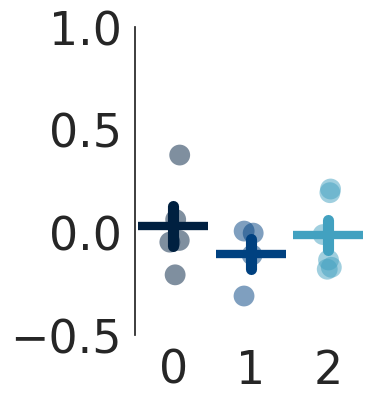

means, sems, and Ns for data is 
0.02791692826358998 0.09696749337185258 5
-0.10550218668059269 0.07341131793709582 4
-0.016180584121850364 0.07302052205820363 6
wk2v4 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.4]: p-value = 0.464326
wk2v6 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.6]: p-value = 0.968967
wk4v6 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.6]: p-value = 0.450591
global s2


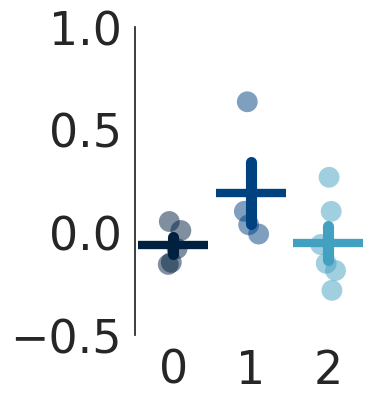

means, sems, and Ns for data is 
-0.06493549149578592 0.0414817860195567 5
0.1907511557349577 0.1497764332587825 4
-0.05236466482165366 0.08310847985487967 6
wk2v4 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.4]: p-value = 0.062194
wk2v6 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.6]: p-value = 0.733804
wk4v6 week: statistics for comparison: linear mixed-effects model, with fish id as random variable
group[T.6]: p-value = 0.127685


In [ ]:
#Stimulus selectivity - global motion

wk2_subjects = ['ml-230427-f4_starfield-3',
                'DZ-230517_wk2_f2-2_starfield',
                'DZ-230517_wk2_f1_starfield',
                'DZ-230518_wk2_f1_z-100_starfield',
                'DZ-230605-f3-100_2wk_starfield']

wk4_subjects= ['DZ-230519_wk4_f1-3_starfield',
               'DZ-230522-f2_-120_4wk_starfield',
               'DZ-230523_wk4_f2_-110_starfield',
               'DZ-230523_wk4_f1_-130_starfield']

wk6_subjects = ['DZ-230521_wk6_f4_starfield',
                'DZ-230522_wk6_f2-2_starfield',
                'DZ-230524_wk6_f1-3_starfield',
                'DZ-230526-f1-140_6wk_starfield',
                'DZ-230525-f4-170_6wk_starfield',
                'DZ-230529_wk6_f1_-130_starfield']

subjects = wk2_subjects+wk4_subjects+wk6_subjects


resample_Hz = 10 #define common Hz to resample all
ts_fraction = [0.05,1.0] #fraction of full timeseries to use

wk2_fraction=[];wk4_fraction=[];wk6_fraction=[];

b_wk2={};b_wk4={};b_wk6={};
for i in ['f_id','f_grp','s1','s2','s1_byfish','s2_byfish']:
  b_wk2[i]=[];b_wk4[i]=[];b_wk6[i]=[];

for f in subjects:
      #print(f)
      path = '/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Starfield/'+f+'/'

      #load processed imaging data
      load = np.load(path+'neuron_details_with-anatomy.npz', allow_pickle=True)
      coords = load['neuron_coordinates']
      xs_=[i[0] for i in coords]
      ys_=[i[1] for i in coords]
      tra=load['neuron_traces']
      neuron_locations = load['neuron_anatomy']

      load=np.load(path+'movement_stats.npz', allow_pickle=True)
      tmp=load['time_sec']
      time=[i-tmp[0] for i in tmp]
      new_time_base = int(max(time)*resample_Hz)
      turn_array=load['any_turn_array']
      stimulus=load['stim']

      s1=np.zeros(len(stimulus));
      s2=np.zeros(len(stimulus));
      for ndx,i in enumerate(stimulus):
        if i>0:
          s1[ndx]=1
        if i<0:
          s2[ndx]=1

      post_stim_dur=12*resample_Hz   #post-stimulus duration (s)

      S1=resized(s1,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
      S2=resized(s2,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
      S1_ON = [ndx for ndx,i in enumerate(S1) if i>0 and S1[ndx-1]==0 and ndx < len(S1)-post_stim_dur]
      S2_ON = [ndx for ndx,i in enumerate(S2) if i>0 and S2[ndx-1]==0 and ndx < len(S2)-post_stim_dur]

      neuron_traces=[];
      for i in tra:
          tmp = resized(i,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
          kernel_size = int(1.0*resample_Hz) #1s
          kernel = np.ones(kernel_size) / kernel_size
          tmp2 = np.convolve(tmp, kernel, mode='smooth') #smooth
          tmp2[:resample_Hz*1]=tmp2[resample_Hz*1] #correcting for edge effects
          tmp2[-resample_Hz*1:]=tmp2[-resample_Hz*1] #correcting for edge effects
          neuron_traces.append(scipy.stats.zscore(tmp2))

      Pvals = [];
      s1_r_gr=[];s2_r_gr=[];
      for tr in neuron_traces:

        s1_r = [(np.mean(tr[onset:onset+post_stim_dur])-np.mean(tr[onset-resample_Hz:onset])) for onset in S1_ON]
        s1_r_gr.append(np.mean(s1_r))
        s2_r = [(np.mean(tr[onset:onset+post_stim_dur])-np.mean(tr[onset-resample_Hz:onset])) for onset in S2_ON]
        s2_r_gr.append(np.mean(s2_r))

        _, p_value1 = stats.ttest_rel([np.mean(tr[onset:onset+post_stim_dur]) for onset in S1_ON], [np.mean(tr[onset-resample_Hz:onset]) for onset in S1_ON])
        _, p_value2 = stats.ttest_rel([np.mean(tr[onset:onset+post_stim_dur]) for onset in S2_ON], [np.mean(tr[onset-resample_Hz:onset]) for onset in S2_ON])

        p_value = min(p_value1,p_value2)
        Pvals.append(p_value)

        if f in wk2_subjects:
          if p_value<0.01:
            wk2_fraction.append(1)
            b_wk2['s1'].append(np.mean(s1_r))
            b_wk2['s2'].append(np.mean(s2_r))
            b_wk2['f_id'].append(f)
            b_wk2['f_grp'].append('2')
          else:
            wk2_fraction.append(0)

        elif f in wk4_subjects:
          if p_value<0.01:
            wk4_fraction.append(1)
            b_wk4['s1'].append(np.mean(s1_r))
            b_wk4['s2'].append(np.mean(s2_r))
            b_wk4['f_id'].append(f)
            b_wk4['f_grp'].append('4')
          else:
            wk4_fraction.append(0)

        elif f in wk6_subjects:
          if p_value<0.01:
            wk6_fraction.append(1)
            b_wk6['s1'].append(np.mean(s1_r))
            b_wk6['s2'].append(np.mean(s2_r))
            b_wk6['f_id'].append(f)
            b_wk6['f_grp'].append('6')
          else:
            wk6_fraction.append(0)

      #by fish
      if f in wk2_subjects:
          b_wk2['s1_byfish'].append(np.mean([np.mean(s) for s,p in zip(s1_r_gr,Pvals) if p<0.01]))
          b_wk2['s2_byfish'].append(np.mean([np.mean(s) for s,p in zip(s2_r_gr,Pvals) if p<0.01]))

      elif f in wk4_subjects:
          b_wk4['s1_byfish'].append(np.mean([np.mean(s) for s,p in zip(s1_r_gr,Pvals) if p<0.01]))
          b_wk4['s2_byfish'].append(np.mean([np.mean(s) for s,p in zip(s2_r_gr,Pvals) if p<0.01]))

      elif f in wk6_subjects:
          b_wk6['s1_byfish'].append(np.mean([np.mean(s) for s,p in zip(s1_r_gr,Pvals) if p<0.01]))
          b_wk6['s2_byfish'].append(np.mean([np.mean(s) for s,p in zip(s2_r_gr,Pvals) if p<0.01]))


print("number of cels 2,4,6:  ", len(wk2_fraction), len(wk4_fraction), len(wk6_fraction))
print("fraction modulated 2,4,6:  ", np.mean(wk2_fraction), np.mean(wk4_fraction), np.mean(wk6_fraction))

for regs,regs_byfish in zip(['s1','s2'],['s1_byfish','s2_byfish']):
      summary_data = [b_wk2[regs],b_wk4[regs],b_wk6[regs]]
      summary_data_byfish = [b_wk2[regs_byfish],b_wk4[regs_byfish],b_wk6[regs_byfish]]
      summary_fids = [b_wk2['f_id'],b_wk4['f_id'],b_wk6['f_id']]
      summary_grps = [b_wk2['f_grp'],b_wk4['f_grp'],b_wk6['f_grp']]


      plt.figure(figsize=[3,4])
      plt.tight_layout(pad=10.0)
      print("global "+regs)
      #plt.ylabel('mean response (sd)')
      sns.pointplot(data=summary_data_byfish, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
      sns.stripplot(data=summary_data_byfish, s=15, palette='ocean', jitter=True, alpha=0.5)
      sns.despine(top=True, right=True, bottom=True)
      plt.ylim(-0.5,1)
      plt.savefig(figure_savepath +"global_motion_selectivity_wholebrain_"+regs+".pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
      plt.show()

      print("means, sems, and Ns for data is ")
      for data in summary_data_byfish:
        print(np.mean(data), scipy.stats.sem(data), len(data))


      for ndxa,groupA,groupB in zip(['wk2v4','wk2v6','wk4v6'],[b_wk2,b_wk2,b_wk4],[b_wk4,b_wk6,b_wk6]):
        print(ndxa,'week: statistics for comparison: linear mixed-effects model, with fish id as random variable')

        df = pd.DataFrame({
                'cell_values': np.concatenate([groupA[regs],groupB[regs]]),
                'group': np.concatenate([groupA['f_grp'],groupB['f_grp']]),
                'fish_ID': np.concatenate([groupA['f_id'],groupB['f_id']]),
                })

        # Convert 'group' to categorical if it's not already
        df['group'] = df['group'].astype('category')

        # Fit the linear mixed-effects model
        model = smf.mixedlm("cell_values ~ group", df, groups=df['fish_ID'])
        result = model.fit()

        # Print the summary of the model
        #print(result.summary())
        p_values = result.pvalues
        # Print p-values with increased precision
        for index,(param, p_value) in enumerate(p_values.items()):
          if index==1:
            print(f"{param}: p-value = {p_value:.6f}")


number of cells ctrl iso:   6758 9898
fraction modulated ctrl iso:   0.1195620005918911 0.11113356233582541
social s1


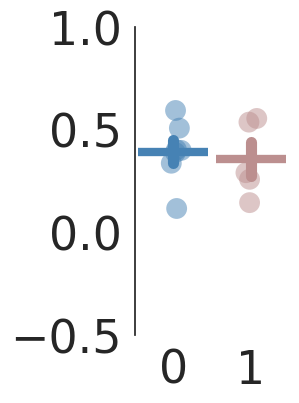

means, sems, and Ns for data is 
0.3909880184529576 0.05633042441626766 7
0.35601620961113073 0.08082267427160078 5
group[T.iso]: p-value = 0.757533
social s2


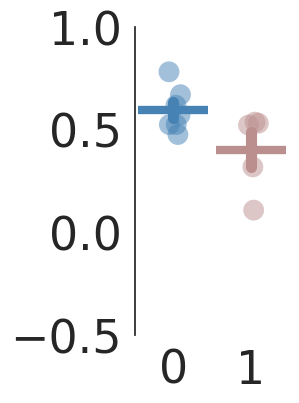

means, sems, and Ns for data is 
0.5946651683547893 0.039500925004707386 7
0.4024404989193059 0.08445976025489474 5
group[T.iso]: p-value = 0.027172
social s3


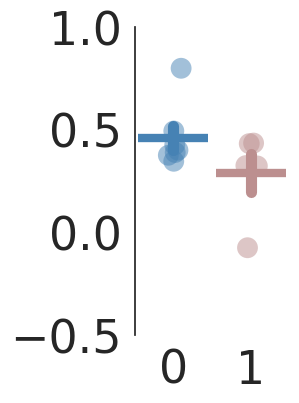

means, sems, and Ns for data is 
0.46031906165016234 0.058953609916332646 7
0.2871059359807086 0.09398873034564763 5
group[T.iso]: p-value = 0.104906
social s4


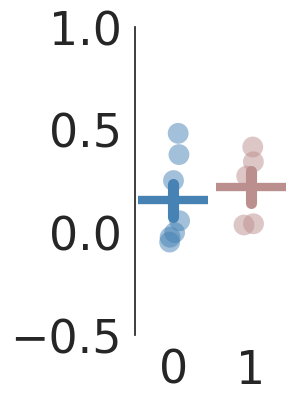

means, sems, and Ns for data is 
0.15574339824313185 0.08069980688637414 7
0.22114766303492278 0.07813631418297733 5
group[T.iso]: p-value = 0.544732


In [ ]:
#Stimulus selectivity - social motion

wk6_subjects=[
'DZ-230529_wk6_f1_-130_schooling',
'DZ-230529_wk6_f2_-110_schooling',
'DZ-230526-f1-140_6wk_schooling',
'DZ-230524_wk6_f1-2_schooling',
'DZ-230522_wk6_f2-2_schooling',
'DZ-230521_wk6_f2_schooling',
]

iso6_subjects=[
'DZ-231025_f1-90_iso6_schooling',
'DZ-231025_f4-90_iso6_schooling',
'DZ-231225_f2_iso6_schooling',
'DZ-231225_f4_iso6_schooling',
'DZ-231225_f5_iso6_schooling',
]


subjects = wk6_subjects+iso6_subjects

wk6_fraction=[]; wk6_iso_fraction=[];

resample_Hz = 10 #define common Hz to resample all
ts_fraction = [0.05,1.0] #fraction of full timeseries to use

b_wk6={}; b_wk6_iso={};
for i in ['f_id','f_grp','s1','s2','s3','s4','s1_byfish','s2_byfish','s3_byfish','s4_byfish']:
  b_wk6[i]=[];  b_wk6_iso[i]=[];

for f in subjects:
      #print(f)
      path = '/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Imaging_Isolated/'+f+'/'

      #load processed imaging data
      load = np.load(path+'neuron_details_with-anatomy.npz', allow_pickle=True)
      coords = load['neuron_coordinates']
      xs=[i[0] for i in coords]
      ys=[i[1] for i in coords]
      tra=load['neuron_traces']
      neuron_locations = load['neuron_anatomy']

      load=np.load(path+'movement_stats.npz', allow_pickle=True)
      tmp=load['time_sec']
      time=[i-tmp[0] for i in tmp]
      new_time_base = int(max(time)*resample_Hz)
      turn_array=load['any_turn_array']
      stimulus=load['stim']

      s1=np.zeros(len(stimulus));
      s2=np.zeros(len(stimulus));
      s3=np.zeros(len(stimulus));
      s4=np.zeros(len(stimulus));

      for ndx,i in enumerate(stimulus):
        if i==1:
          s1[ndx]=1
        if i==2:
          s2[ndx]=1
        if i==3:
          s3[ndx]=1
        if i==4:
          s4[ndx]=1

      #resample all to common Hz, and crop to first X% of behavior
      S1=resized(s1,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
      S2=resized(s2,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
      S3=resized(s3,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
      S4=resized(s4,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]

      #get stimulus onset times
      post_stim_dur=12*resample_Hz   #post-stimulus duration (s)

      S1_ON = [ndx for ndx,i in enumerate(S1) if i>0 and S1[ndx-1]==0 and post_stim_dur < ndx < len(S1)-post_stim_dur]
      S2_ON = [ndx for ndx,i in enumerate(S2) if i>0 and S2[ndx-1]==0 and post_stim_dur < ndx < len(S2)-post_stim_dur]
      S3_ON = [ndx for ndx,i in enumerate(S3) if i>0 and S3[ndx-1]==0 and post_stim_dur < ndx < len(S3)-post_stim_dur]
      S4_ON = [ndx for ndx,i in enumerate(S4) if i>0 and S4[ndx-1]==0 and post_stim_dur < ndx < len(S4)-post_stim_dur]

      neuron_traces=[];
      for i in tra:
          tmp = resized(i,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
          kernel_size = int(1.0*resample_Hz) #1s
          kernel = np.ones(kernel_size) / kernel_size
          tmp2 = np.convolve(tmp, kernel, mode='smooth') #smooth
          tmp2[:resample_Hz*1]=tmp2[resample_Hz*1] #correcting for edge effects
          tmp2[-resample_Hz*1:]=tmp2[-resample_Hz*1] #correcting for edge effects
          neuron_traces.append(scipy.stats.zscore(tmp2))

      Pvals = [];
      s1_r_gr=[];s2_r_gr=[];s3_r_gr=[];s4_r_gr=[];
      for tr in neuron_traces:
        s1_r=[(np.mean(tr[onset:onset+post_stim_dur])-np.mean(tr[onset-resample_Hz:onset])) for onset in S1_ON]
        s1_r_gr.append(np.mean(s1_r))
        s2_r=[(np.mean(tr[onset:onset+post_stim_dur])-np.mean(tr[onset-resample_Hz:onset])) for onset in S2_ON]
        s2_r_gr.append(np.mean(s2_r))
        s3_r=[(np.mean(tr[onset:onset+post_stim_dur])-np.mean(tr[onset-resample_Hz:onset])) for onset in S3_ON]
        s3_r_gr.append(np.mean(s3_r))
        s4_r=[(np.mean(tr[onset:onset+post_stim_dur])-np.mean(tr[onset-resample_Hz:onset])) for onset in S4_ON]
        s4_r_gr.append(np.mean(s4_r))

        _, p_value1 = stats.ttest_rel([np.mean(tr[onset:onset+post_stim_dur]) for onset in S1_ON], [np.mean(tr[onset-resample_Hz:onset]) for onset in S1_ON])
        _, p_value2 = stats.ttest_rel([np.mean(tr[onset:onset+post_stim_dur]) for onset in S2_ON], [np.mean(tr[onset-resample_Hz:onset]) for onset in S2_ON])
        _, p_value3 = stats.ttest_rel([np.mean(tr[onset:onset+post_stim_dur]) for onset in S3_ON], [np.mean(tr[onset-resample_Hz:onset]) for onset in S3_ON])
        _, p_value4 = stats.ttest_rel([np.mean(tr[onset:onset+post_stim_dur]) for onset in S4_ON], [np.mean(tr[onset-resample_Hz:onset]) for onset in S4_ON])

        p_value = min(p_value1,p_value2,p_value3,p_value4)
        Pvals.append(p_value)

        if f in wk6_subjects:
          if p_value<0.01:
            wk6_fraction.append(1)
            b_wk6['s1'].append(np.mean(s1_r))
            b_wk6['s2'].append(np.mean(s2_r))
            b_wk6['s3'].append(np.mean(s3_r))
            b_wk6['s4'].append(np.mean(s4_r))
            b_wk6['f_id'].append(f)
            b_wk6['f_grp'].append('6')
          else:
            wk6_fraction.append(0)

        elif f in iso6_subjects:
          if p_value<0.01:
            wk6_iso_fraction.append(1)
            b_wk6_iso['s1'].append(np.mean(s1_r))
            b_wk6_iso['s2'].append(np.mean(s2_r))
            b_wk6_iso['s3'].append(np.mean(s3_r))
            b_wk6_iso['s4'].append(np.mean(s4_r))
            b_wk6_iso['f_id'].append(f)
            b_wk6_iso['f_grp'].append('iso')
          else:
            wk6_iso_fraction.append(0)

      if f in wk6_subjects:
          b_wk6['s1_byfish'].append(np.mean([np.mean(s) for s,p in zip(s1_r_gr,Pvals) if p<0.01]))
          b_wk6['s2_byfish'].append(np.mean([np.mean(s) for s,p in zip(s2_r_gr,Pvals) if p<0.01]))
          b_wk6['s3_byfish'].append(np.mean([np.mean(s) for s,p in zip(s3_r_gr,Pvals) if p<0.01]))
          b_wk6['s4_byfish'].append(np.mean([np.mean(s) for s,p in zip(s4_r_gr,Pvals) if p<0.01]))
      elif f in iso6_subjects:
          b_wk6_iso['s1_byfish'].append(np.mean([np.mean(s) for s,p in zip(s1_r_gr,Pvals) if p<0.01]))
          b_wk6_iso['s2_byfish'].append(np.mean([np.mean(s) for s,p in zip(s2_r_gr,Pvals) if p<0.01]))
          b_wk6_iso['s3_byfish'].append(np.mean([np.mean(s) for s,p in zip(s3_r_gr,Pvals) if p<0.01]))
          b_wk6_iso['s4_byfish'].append(np.mean([np.mean(s) for s,p in zip(s4_r_gr,Pvals) if p<0.01]))


print("number of cells ctrl iso:  ", len(wk6_fraction), len(wk6_iso_fraction))
print("fraction modulated ctrl iso:  ", np.mean(wk6_fraction), np.mean(wk6_iso_fraction))

for regs,regs_byfish in zip(['s1','s2','s3','s4'],['s1_byfish','s2_byfish','s3_byfish','s4_byfish']):
      summary_data = [b_wk6[regs],b_wk6_iso[regs]]
      summary_data_byfish = [b_wk6[regs_byfish],b_wk6_iso[regs_byfish]]
      summary_fids = [b_wk6['f_id'],b_wk6_iso['f_id']]
      summary_grps = [b_wk6['f_grp'],b_wk6_iso['f_grp']]

      plt.figure(figsize=[2,4])
      plt.tight_layout(pad=10.0)
      print("social "+regs)
      #plt.ylabel('mean response (sd)')
      sns.pointplot(data=summary_data_byfish, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette=['steelblue', 'rosybrown'], linestyle='none')
      sns.stripplot(data=summary_data_byfish, s=15, palette=['steelblue', 'rosybrown'], jitter=True, alpha=0.5)
      sns.despine(top=True, right=True, bottom=True)
      plt.ylim(-0.5,1)
      plt.savefig(figure_savepath +"social_motion_selectivity_isolated_wholebrain_"+regs+".pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
      plt.show()

      print("means, sems, and Ns for data is ")
      for data in summary_data_byfish:
        print(np.mean(data), scipy.stats.sem(data), len(data))

      df = pd.DataFrame({
                'cell_values': np.concatenate([b_wk6[regs],b_wk6_iso[regs]]),
                'group': np.concatenate([b_wk6['f_grp'],b_wk6_iso['f_grp']]),
                'fish_ID': np.concatenate([b_wk6['f_id'],b_wk6_iso['f_id']]),
                })

      # Convert 'group' to categorical if it's not already
      df['group'] = df['group'].astype('category')

      # Fit the linear mixed-effects model
      model = smf.mixedlm("cell_values ~ group", df, groups=df['fish_ID'])
      result = model.fit()

      # Print the summary of the model
      #print(result.summary())
      p_values = result.pvalues
      # Print p-values with increased precision
      for index,(param, p_value) in enumerate(p_values.items()):
        if index==1:
          print(f"{param}: p-value = {p_value:.6f}")
